### The ndex2 python package
The ndex2 package provides a convenient wrapper around the NDEx server API. NDEx networks are transfered in the CX (Cytoscape Exchange) format and ndex2 includes the NiceCX Python to simplify the use of CX data. NiceCX does not provide common network manipulation functionality. For that, it is better to cast the data into forms such as networkx or igraph.
The Sphinx documentation for the ndex2 package is at https://ndex2.readthedocs.io/en/latest/
Additional documentation and examples, including Jupyter Notebooks are available in the ndex2 GitHub repo: https://github.com/ndexbio/ndex2-client

In [1]:
#NDEx set up
SERVER = 'ndexbio.org'
USERNAME = input('Username: ')
PASSWORD = input('Password: ')

NETWORK_UUID = 'fa7405cf-3d7f-11ea-bfdc-0ac135e8bacf'
STYLE_NETWORK_UUID = '145a6a47-78ee-11e9-848d-0ac135e8bacf'

Username: sol015
Password: test


In [2]:
#ndex2: download network from NDEx
import ndex2

nice_cx_network = ndex2.create_nice_cx_from_server(SERVER, uuid=NETWORK_UUID)

In [3]:
#py4cytoscape: download network from NDEx
import py4cytoscape as py4

network_suid = py4.cy_ndex.import_network_from_ndex(NETWORK_UUID)

[INFO] py4...S:  ǀHTTP POST(http://localhost:1234/cyndex2/v1/networks), json: {'serverUrl': 'http://ndexbio.org/v2', 'uuid': 'fa7405cf-3d7f-11ea-bfdc-0ac135e8bacf'}
[INFO] py4...S:  ǀOK[200]


In [4]:
#ndex2: get a style template network and apply the style to the network
nice_cx_network.apply_template(SERVER, STYLE_NETWORK_UUID)

In [5]:
#py4cytoscape: get a style template network
style_network_suid = py4.cy_ndex.import_network_from_ndex(STYLE_NETWORK_UUID)

[INFO] py4...S:  ǀHTTP POST(http://localhost:1234/cyndex2/v1/networks), json: {'serverUrl': 'http://ndexbio.org/v2', 'uuid': '145a6a47-78ee-11e9-848d-0ac135e8bacf'}
[INFO] py4...S:  ǀOK[200]


In [6]:
#py4cytoscape: apply the style to the network
style_network_name = py4.networks.get_network_name(style_network_suid)
py4.styles.set_visual_style(style_network_name + '-Style', network=network_suid)

[INFO] py4...S:  ǀHTTP GET(http://localhost:1234/v1/networks.names), params: {'column': 'suid', 'query': 11466}
[INFO] py4...S:  ǀOK[200]
[INFO] py4...S:  ǀǀHTTP GET(http://localhost:1234/v1/networks)
[INFO] py4...S:  ǀǀOK[200]
[INFO] py4...S:  ǀǀHTTP GET(http://localhost:1234/v1/apply/styles)
[INFO] py4...S:  ǀǀOK[200]
[INFO] py4...S:  ǀHTTP GET(http://localhost:1234/v1/apply/styles/NDEx%20default%20style%20v2-Style/11289)
[INFO] py4...S:  ǀOK[200]


{'message': 'Visual Style applied.'}

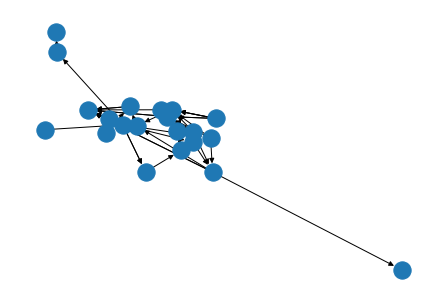

In [7]:
#ndex2: apply a layout to the network
import networkx as nx

#Make and view layout
networkx_network = nice_cx_network.to_networkx(mode='default')
pos = nx.drawing.layout.spring_layout(networkx_network, scale=1000)
nx.draw(networkx_network, pos)

#Transfer layout back to original network
new_cartesian_layout = []
for node_id, coordinates in pos.items():
    new_cartesian_layout.append({
        'node': node_id,
        'x': coordinates[0],
        'y': coordinates[1]
    })
nice_cx_network.set_opaque_aspect(ndex2.constants.CARTESIAN_LAYOUT_ASPECT, new_cartesian_layout)

In [8]:
#py4cytoscape: apply a layout to the network
py4.layouts.layout_network('force-directed', network=network_suid)

[INFO] py4...S:  ǀǀHTTP GET(http://localhost:1234/v1/networks)
[INFO] py4...S:  ǀǀOK[200]
[INFO] py4...S:  ǀHTTP POST(http://localhost:1234/v1/commands/layout/force-directed), data: b'{"network": "SUID:11289"}'
[INFO] py4...S:  ǀOK[200]


{}

In [9]:
#ndex2: save the network to your account in NDEx
nice_cx_network.upload_to(SERVER, USERNAME, PASSWORD)

Generating CX


'http://public.ndexbio.org/v2/network/5ba8e288-b7f0-11ea-aaef-0ac135e8bacf'

In [10]:
#py4cytoscape: save the network to your account in NDEx
py4.cy_ndex.export_network_to_ndex(USERNAME, PASSWORD, is_public=True, network=network_suid)

[INFO] py4...S:  ǀǀHTTP GET(http://localhost:1234/v1/networks)
[INFO] py4...S:  ǀǀOK[200]
[INFO] py4...S:  ǀHTTP POST(http://localhost:1234/cyndex2/v1/networks/11289), json: {'serverUrl': 'http://ndexbio.org/v2', 'username': 'sol015', 'password': 'test', 'metadata': None, 'isPublic': True}
[INFO] py4...S:  ǀOK[200]


'5c0e340a-b7f0-11ea-aaef-0ac135e8bacf'

In [11]:
#ndex2 and py4cytoscape: load protein interaction tabular data as a pandas dataframe
import pandas as pd
ppi_data = pd.read_csv('~/Desktop/ap-ms-demodata.csv', sep=',')
ppi_data

,Bait,Prey,UniProt,HEKScore,JurkatScore,AP-MS Score
0,GAG,THRAP3,Q9Y2W1,0.807,0.319,0.563
1,GAG,SEPSECS,Q9HD40,0.814,0.200,0.507
2,GAG,IVNS1ABP,Q9Y6Y0,0.753,0.260,0.506
3,GAG,DDX49,Q9Y6V7,0.824,0.000,0.412
4,GAG,PRMT1,Q99873,0.758,0.037,0.397
...,...,...,...,...,...,...
494,GP41,TOMM40,O96008,0.762,0.000,0.381
495,GP41,GLG1,Q92896,0.000,0.762,0.381
496,GP41,NGLY1,Q96IV0,0.000,0.756,0.378
497,GP41,SEC62,Q99442,0.000,0.751,0.376


In [12]:
#ndex2: load protein interaction tabular data as a PPI network
import pandas as pd
ppi_network = ndex2.create_nice_cx_from_pandas(
    ppi_data,
    source_field='Bait',
    target_field='Prey',
    target_node_attr=['UniProt'],
    edge_attr=['HEKScore', 'JurkatScore', 'AP-MS Score']
)
ppi_network.set_name('AP-MS Demo Data (ndex2)')

0


In [13]:
#py4cytoscape: load protein interaction tabular data as a PPI network
import pandas as pd
py4_ppi_data = ppi_data.rename(columns={'Bait': 'source', 'Prey': 'target'})
ppi_network_suid = py4.networks.create_network_from_data_frames(edges=py4_ppi_data, title='AP-MS Demo Data (py4)')

[INFO] py4...S:  ǀHTTP POST(http://localhost:1234/v1/networks), params: {'title': 'AP-MS Demo Data (py4)', 'collection': 'My Dataframe Network Collection'}, json: {'data': [{'name': 'AP-MS Demo Data (py4)'}], 'elements': {'nodes': [{'data': {'id': 'GAG'}}, {'data': {'id': 'THRAP3'}}, {'data': {'id': 'GAG'}}, {'data': {'id': 'SEPSECS'}}, {'data': {'id': 'GAG'}}, {'data': {'id': 'IVNS1ABP'}}, {'data': {'id': 'GAG'}}, {'data': {'id': 'DDX49'}}, {'data': {'id': 'GAG'}}, {'data': {'id': 'PRMT1'}}, {'data': {'id': 'GAG'}}, {'data': {'id': 'OLA1'}}, {'data': {'id': 'GAG'}}, {'data': {'id': 'EIF2AK2'}}, {'data': {'id': 'GAG'}}, {'data': {'id': 'RBM17'}}, {'data': {'id': 'MA'}}, {'data': {'id': 'EPRS'}}, {'data': {'id': 'MA'}}, {'data': {'id': 'OLA1'}}, {'data': {'id': 'MA'}}, {'data': {'id': 'SEPSECS'}}, {'data': {'id': 'MA'}}, {'data': {'id': 'EEF1E1'}}, {'data': {'id': 'MA'}}, {'data': {'id': 'DARS'}}, {'data': {'id': 'MA'}}, {'data': {'id': 'RARS'}}, {'data': {'id': 'MA'}}, {'data': {'id': 

[INFO] py4...S:  ǀOK[200]
[INFO] py4...S:  ǀǀǀHTTP POST(http://localhost:1234/v1/commands/network/get%20attribute), data: b'{"network": "current", "namespace": "default", "columnList": "SUID"}'
[INFO] py4...S:  ǀǀǀOK[200]
[INFO] py4...S:  ǀǀǀǀHTTP GET(http://localhost:1234/v1/networks)
[INFO] py4...S:  ǀǀǀǀOK[200]
[INFO] py4...S:  ǀǀǀǀǀHTTP GET(http://localhost:1234/v1/networks)
[INFO] py4...S:  ǀǀǀǀǀOK[200]
[INFO] py4...S:  ǀǀǀǀHTTP GET(http://localhost:1234/v1/networks/11729/tables/defaultnode/columns)
[INFO] py4...S:  ǀǀǀǀOK[200]
[INFO] py4...S:  ǀǀǀHTTP GET(http://localhost:1234/v1/networks/11729/tables/defaultnode/columns/SUID)
[INFO] py4...S:  ǀǀǀOK[200]
[INFO] py4...S:  ǀǀǀHTTP GET(http://localhost:1234/v1/networks/11729/tables/defaultnode/columns/id)
[INFO] py4...S:  ǀǀǀOK[200]
[INFO] py4...S:  ǀǀǀǀHTTP GET(http://localhost:1234/v1/networks)
[INFO] py4...S:  ǀǀǀǀOK[200]
[INFO] py4...S:  ǀǀǀHTTP GET(http://localhost:1234/v1/networks/11729/tables/defaultnode/columns)
[INFO] py4..

[INFO] py4...S:  ǀǀOK[200]
[INFO] py4...S:  ǀǀǀHTTP POST(http://localhost:1234/v1/commands/network/get%20attribute), data: b'{"network": "current", "namespace": "default", "columnList": "SUID"}'
[INFO] py4...S:  ǀǀǀOK[200]
[INFO] py4...S:  ǀǀǀǀHTTP POST(http://localhost:1234/v1/commands/network/get%20attribute), data: b'{"network": "current", "namespace": "default", "columnList": "SUID"}'
[INFO] py4...S:  ǀǀǀǀOK[200]
[INFO] py4...S:  ǀǀǀHTTP GET(http://localhost:1234/v1/networks/11729/tables/defaultedge/columns)
[INFO] py4...S:  ǀǀǀOK[200]
[INFO] py4...S:  ǀǀHTTP GET(http://localhost:1234/v1/networks/11729/tables/defaultedge/columns/SUID)
[INFO] py4...S:  ǀǀOK[200]
[INFO] py4...S:  ǀǀHTTP GET(http://localhost:1234/v1/networks/11729/tables/defaultedge/columns/name)
[INFO] py4...S:  ǀǀOK[200]
[INFO] py4...S:  ǀǀǀHTTP POST(http://localhost:1234/v1/commands/network/get%20attribute), data: b'{"network": "current", "namespace": "default", "columnList": "SUID"}'
[INFO] py4...S:  ǀǀǀOK[200]
[I

[INFO] py4...S:  ǀǀOK[200]
[INFO] py4...S:  ǀHTTP POST(http://localhost:1234/v1/commands/vizmap/apply), data: b'{"styles": "default"}'
[INFO] py4...S:  ǀOK[200]
[INFO] py4...S:  ǀǀǀHTTP POST(http://localhost:1234/v1/commands/network/get%20attribute), data: b'{"network": "current", "namespace": "default", "columnList": "SUID"}'
[INFO] py4...S:  ǀǀǀOK[200]
[INFO] py4...S:  ǀǀHTTP POST(http://localhost:1234/v1/commands/layout/apply%20preferred), data: b'{"networkSelected": "SUID:11729"}'


Applying default style...
Applying preferred layout


[INFO] py4...S:  ǀǀOK[200]


In [14]:
#ndex2: load annotation data into a dictionary
annotation_dict = {}

with open('/Users/sophieliu/Desktop/annotationData.csv') as file:
    header = True
    for line in file:
        if header:
            header = False
            continue
        data = line.strip().split(',')
        annotation_dict[data[3]] = {
            'p-value': data[0],
            'FCAbsolute': data[1],
            'Regulation': data[2]
        }

annotation_dict

{'ZNF594': {'p-value': '0.02702854',
  'FCAbsolute': '2.0067427',
  'Regulation': 'up'},
 'GRB10': {'p-value': '0.030573033',
  'FCAbsolute': '5.1734447',
  'Regulation': 'up'},
 'MTHFD2': {'p-value': '0.0070619984',
  'FCAbsolute': '1.8817973',
  'Regulation': 'up'},
 'ATF3': {'p-value': '0.044249944',
  'FCAbsolute': '3.4399707',
  'Regulation': 'up'},
 'PMAIP1': {'p-value': '0.03166174',
  'FCAbsolute': '1.9554087',
  'Regulation': 'up'},
 'COPZ2': {'p-value': '0.039795224',
  'FCAbsolute': '1.7965584',
  'Regulation': 'up'},
 'IL13RA1': {'p-value': '0.03673334',
  'FCAbsolute': '1.5314373',
  'Regulation': 'up'},
 'SNHG7': {'p-value': '0.029924138',
  'FCAbsolute': '1.5320934',
  'Regulation': 'up'},
 'CCL5': {'p-value': '0.011322869',
  'FCAbsolute': '2.0074718',
  'Regulation': 'up'},
 'PMEPA1': {'p-value': '0.018944085',
  'FCAbsolute': '1.7685622',
  'Regulation': 'up'},
 'MMP9': {'p-value': '0.047956187',
  'FCAbsolute': '1.5793306',
  'Regulation': 'up'},
 'JMY': {'p-value': 

In [15]:
#py4cytoscape: load annotation data as a dataframe
annotation_data = pd.read_csv('~/Desktop/annotationData.csv', sep=',')
annotation_data

,P-value,FCAbsolute,Regulation,GeneSymbol
0,0.027029,2.006743,up,ZNF594
1,0.012443,2.644313,up,GRB10
2,0.007062,1.881797,up,MTHFD2
3,0.044250,3.439971,up,ATF3
4,0.031662,1.955409,up,PMAIP1
...,...,...,...,...
311,0.007729,2.957946,down,SLC2A5
312,0.009410,1.861381,down,NaN
313,0.019493,1.599525,down,NaN
314,0.001827,1.699154,down,INF2


In [16]:
#ndex2: annotate the PPI network with tabular gene expression data
for node_id, node in ppi_network.get_nodes():
    if node['n'] in annotation_dict:
        for key, value in annotation_dict[node['n']].items():
            if key == 'Regulation':
                dataType = 'string'
            else:
                dataType = 'double'
            ppi_network.set_node_attribute(node_id, key, value, type=dataType)     

In [17]:
#py4cytoscape: annotate the PPI network with tabular gene expression data
py4.tables.load_table_data(annotation_data, data_key_column='GeneSymbol')

[INFO] py4...S:  ǀǀHTTP POST(http://localhost:1234/v1/commands/network/get%20attribute), data: b'{"network": "current", "namespace": "default", "columnList": "SUID"}'
[INFO] py4...S:  ǀǀOK[200]
[INFO] py4...S:  ǀǀǀHTTP GET(http://localhost:1234/v1/networks)
[INFO] py4...S:  ǀǀǀOK[200]
[INFO] py4...S:  ǀǀǀǀHTTP GET(http://localhost:1234/v1/networks)
[INFO] py4...S:  ǀǀǀǀOK[200]
[INFO] py4...S:  ǀǀǀHTTP GET(http://localhost:1234/v1/networks/11729/tables/defaultnode/columns)
[INFO] py4...S:  ǀǀǀOK[200]
[INFO] py4...S:  ǀǀHTTP GET(http://localhost:1234/v1/networks/11729/tables/defaultnode/columns/SUID)
[INFO] py4...S:  ǀǀOK[200]
[INFO] py4...S:  ǀǀHTTP GET(http://localhost:1234/v1/networks/11729/tables/defaultnode/columns/name)
[INFO] py4...S:  ǀǀOK[200]
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/py4cytoscape-0.0.1-py3.8.egg/py4cytoscape/tables.py:410: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

'Success: Data loaded in defaultnode table'

In [18]:
#ndex2: save PPI network to ndex
ppi_network.upload_to(SERVER, USERNAME, PASSWORD)

Generating CX


'http://public.ndexbio.org/v2/network/6a0d45ac-b7f0-11ea-aaef-0ac135e8bacf'

In [19]:
#py4cytoscape: save PPI network to ndex
py4.cy_ndex.export_network_to_ndex(USERNAME, PASSWORD, is_public=False, network=ppi_network_suid)

[INFO] py4...S:  ǀǀHTTP POST(http://localhost:1234/v1/commands/network/get%20attribute), data: b'{"network": "current", "namespace": "default", "columnList": "SUID"}'
[INFO] py4...S:  ǀǀOK[200]
[INFO] py4...S:  ǀHTTP POST(http://localhost:1234/cyndex2/v1/networks/11729), json: {'serverUrl': 'http://ndexbio.org/v2', 'username': 'sol015', 'password': 'test', 'metadata': None, 'isPublic': False}
[INFO] py4...S:  ǀOK[200]


'6aa2f5ff-b7f0-11ea-aaef-0ac135e8bacf'